In [120]:
#importer les packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [121]:
# Load data
data = pd.read_csv('./Data/2020/heart_2020_cleaned.csv')

In [122]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [123]:
data.columns

Index(['HeartDisease ', 'BMI   ', 'Smoking ', 'AlcoholDrinking ', 'Stroke ',
       'PhysicalHealth ', 'MentalHealth ', 'DiffWalking ', 'Sex    ',
       'AgeCategory ', 'Race                           ',
       'Diabetic                  ', 'PhysicalActivity ', 'GenHealth ',
       'SleepTime ', 'Asthma ', 'KidneyDisease ', 'SkinCancer'],
      dtype='object')

In [124]:
#Remove Spaces in the columns of the dataset
data.columns = data.columns.str.strip()

In [125]:
#Verify the result
print(data.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [126]:
# Splitting the data into numerical and categorical data
cat_data=[]
num_data=[]
for i,c in enumerate(data.dtypes):
    if c == object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()
cat_data

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


In [127]:
# One-Hot Encoding the categorical data
cat_data = pd.get_dummies(cat_data, columns=['AgeCategory', 'GenHealth', 'Race'])
cat_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,No,Yes,No,No,No,Female,Yes,Yes,Yes,No,...,False,False,False,True,False,False,False,False,False,True
1,No,No,No,Yes,No,Female,No,Yes,No,No,...,False,False,False,True,False,False,False,False,False,True
2,No,Yes,No,No,No,Male,Yes,Yes,Yes,No,...,True,False,False,False,False,False,False,False,False,True
3,No,No,No,No,No,Female,No,No,No,No,...,False,True,False,False,False,False,False,False,False,True
4,No,No,No,No,Yes,Female,No,Yes,No,No,...,False,False,False,True,False,False,False,False,False,True


In [128]:
# HeartDisease to numerical
target_value = {'Yes':1,'No':0}
target = cat_data['HeartDisease']
# remove spaces
target = target.str.strip()
cat_data.drop('HeartDisease',axis=1,inplace=True)
target = target.map(target_value)
target

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [129]:
# Label Encoding the categorical data
le = LabelEncoder()
cat_data = cat_data.apply(le.fit_transform)
cat_data.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,1,0,0,0,0,2,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,1,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [130]:
#Remove Spaces in the columns of the cat_dataset
cat_data.columns = cat_data.columns.str.strip()
cat_data.columns

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White'],
      dtype='object')

In [131]:
# Concatenate the data
data = pd.concat([cat_data,num_data,target],axis=1)
X = pd.concat([cat_data,num_data],axis=1)
y = target

In [132]:
data.columns

Index(['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
       'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'BMI', 'PhysicalHealth',
       'MentalHealth', 'SleepTime', 'HeartDisease'],
      dtype='object')

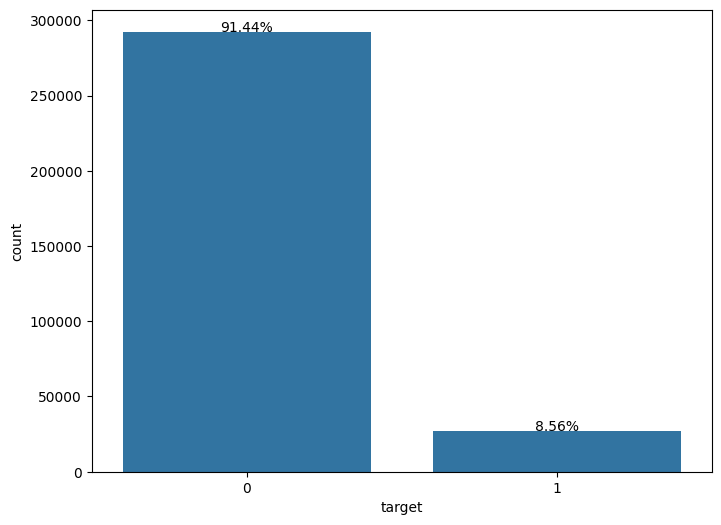

In [133]:
# Visualisation of the target
counts = target.value_counts()
percentages = counts / len(target) * 100

# Create a DataFrame from the target Series
df_target = pd.DataFrame({'target': target})

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_target)

for i, count in enumerate(counts):
    plt.text(i, count, f'{percentages[i]:.2f}%', ha='center')

plt.show()

In [134]:
# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

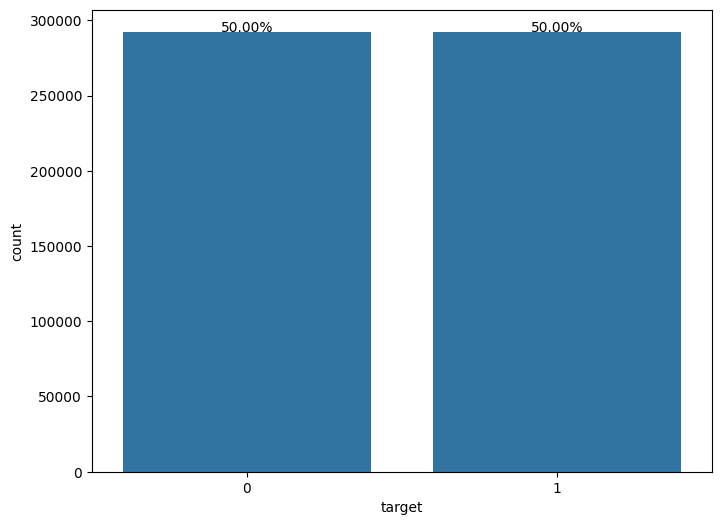

In [135]:

# Visualisation of the target after SMOTE
counts = y_smote.value_counts()
percentages = counts / len(y_smote) * 100

# Create a DataFrame from the target Series
df_target = pd.DataFrame({'target': y_smote})

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_target)

for i, count in enumerate(counts):
    plt.text(i, count, f'{percentages[i]:.2f}%', ha='center')

plt.show()

In [136]:
# Split the data
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X_smote, y_smote):
    X_train, X_test = X_smote.iloc[train_index], X_smote.iloc[test_index]
    y_train, y_test = y_smote.iloc[train_index], y_smote.iloc[test_index]

In [137]:
# Logistic Regression, KNN, Decision Tree
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=1,random_state=42)
}

In [138]:
# Precision of the models
def accuracy(y_true,y_pred,return_score=False):
    acc = accuracy_score(y_true,y_pred)
    if return_score:
        return acc
    else:
        print(f'Accuracy: {acc}')

In [139]:
# Models Application & Evalusation Function
def apply_model(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(name)
        accuracy(y_test,y_pred)
        print('-'*30)

In [140]:
# Apply Models
apply_model(models,X_train,y_train,X_test,y_test)

C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.8286469064452975
------------------------------
KNN
Accuracy: 0.8354435790679582
------------------------------
Decision Tree
Accuracy: 0.59483281895203
------------------------------


In [141]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy(y_test,y_pred)

Accuracy: 0.9244500679667262


In [142]:
# Print Evaluation Metrics
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))
print('F1 Score:',f1_score(y_test,y_pred))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))

Precision: 0.9321564735989972
Recall: 0.9155324533205663
F1 Score: 0.9237696786715549
ROC AUC Score: 0.9244499917282493
Confusion Matrix: [[54588  3897]
 [ 4940 53544]]


In [143]:
# Save the model
pickle.dump(rf, open('./heart_disease_model.pkl', 'wb'))